<a href="https://colab.research.google.com/github/gabiirimia99/HDR-Organization-proiect-3-gabiirimia99/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


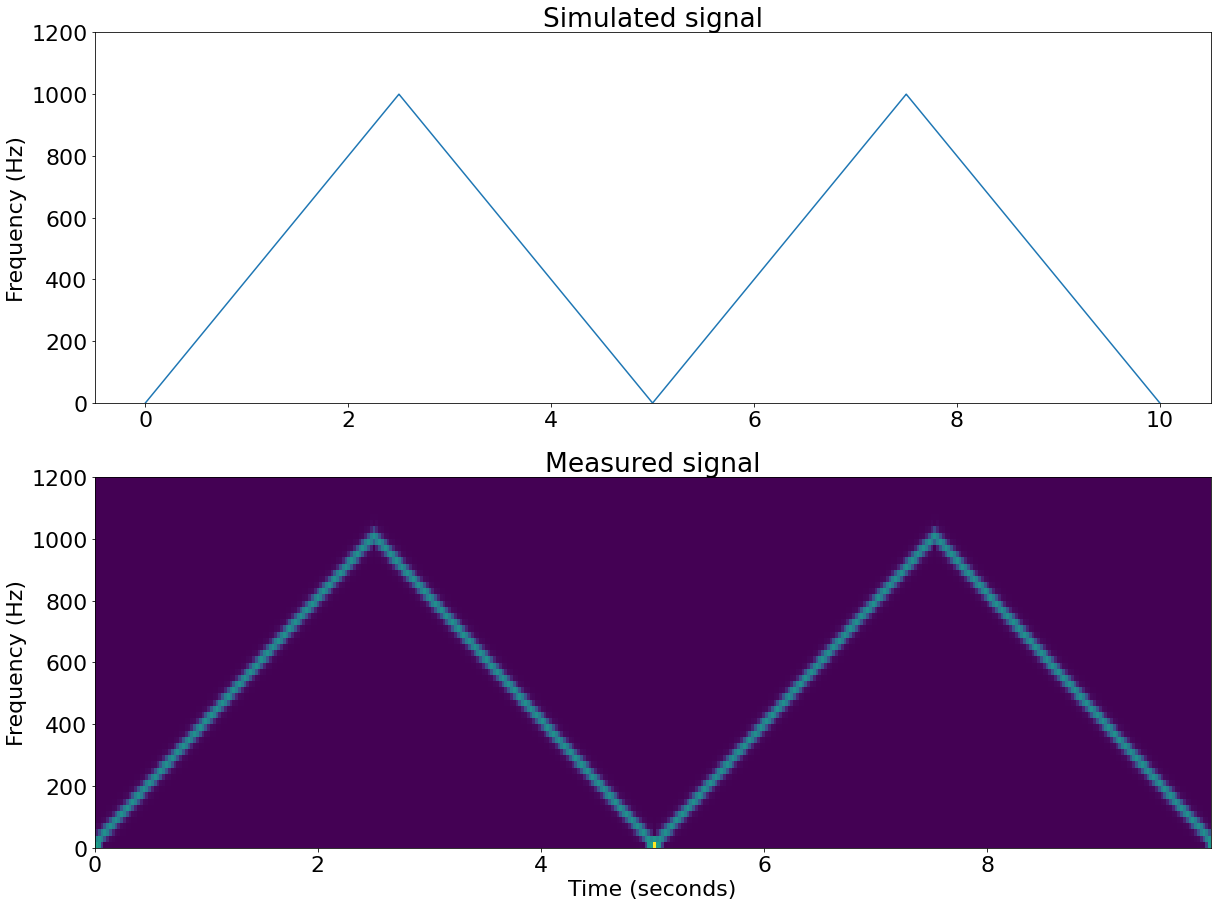

<ipython-input-8-ff203872dfc2>:158: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)
<ipython-input-8-ff203872dfc2>:164: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(212)


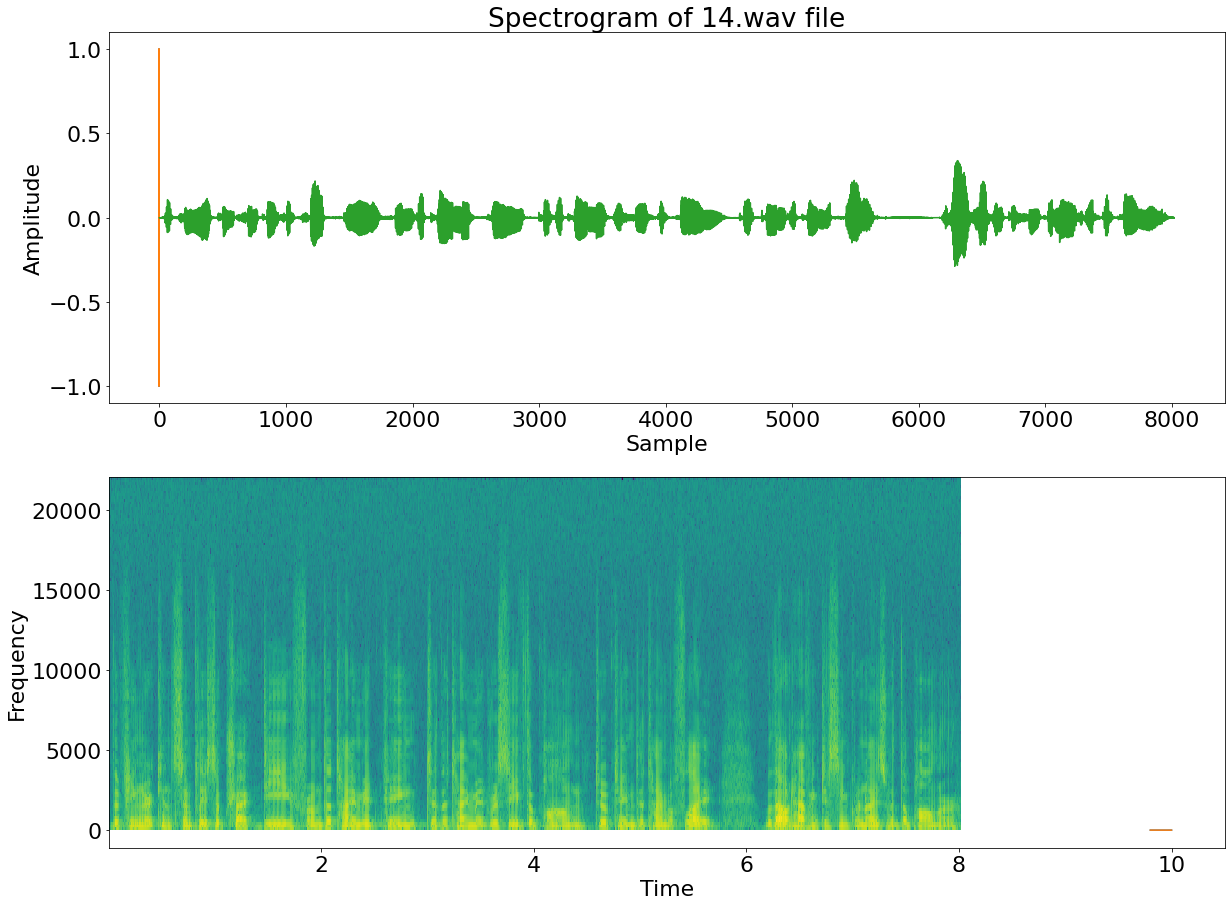

(array([   0.   ,   15.625,   31.25 ,   46.875,   62.5  ,   78.125,
          93.75 ,  109.375,  125.   ,  140.625,  156.25 ,  171.875,
         187.5  ,  203.125,  218.75 ,  234.375,  250.   ,  265.625,
         281.25 ,  296.875,  312.5  ,  328.125,  343.75 ,  359.375,
         375.   ,  390.625,  406.25 ,  421.875,  437.5  ,  453.125,
         468.75 ,  484.375,  500.   ,  515.625,  531.25 ,  546.875,
         562.5  ,  578.125,  593.75 ,  609.375,  625.   ,  640.625,
         656.25 ,  671.875,  687.5  ,  703.125,  718.75 ,  734.375,
         750.   ,  765.625,  781.25 ,  796.875,  812.5  ,  828.125,
         843.75 ,  859.375,  875.   ,  890.625,  906.25 ,  921.875,
         937.5  ,  953.125,  968.75 ,  984.375, 1000.   , 1015.625,
        1031.25 , 1046.875, 1062.5  , 1078.125, 1093.75 , 1109.375,
        1125.   , 1140.625, 1156.25 , 1171.875, 1187.5  , 1203.125,
        1218.75 , 1234.375, 1250.   , 1265.625, 1281.25 , 1296.875,
        1312.5  , 1328.125, 1343.75 , 1359.375, 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from google.colab import drive
drive.mount('/content/drive')


plt.rcParams['figure.figsize'] = (20, 15) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams.update({'font.size': 22})


def stft(x, fs, frame_size, hop):
  """
  Perform STFT (Short-Time Fourier Transform).

  x: Input data.
  fs: Sampling rate.
  frame_size: Frame size.
  hop: Hop size
  """

  frame_samp = int(frame_size*fs)
  hop_samp = int(hop*fs)
  w = np.hanning(frame_samp) # Hanning window
  X = np.array([np.fft.fft(w*x[i:i+frame_samp])
               for i in range(0, len(x)-frame_samp, hop_samp)])
  return X

def istft(X, fs, T, hop):
  """
  Perform inverse STFT (Short-Time Fourier Transform).

  X: Input data.
  fs: Sampling rate.
  T: Total time duration.
  hop: Hop size.
  """

  x = np.zeros(T*fs)
  frame_samp = X.shape[1]
  hop_samp = int(hop*fs)

  for n,i in enumerate(range(0, len(x)-frame_samp, hop_samp)):
    x[i:i+frame_samp] += np.real(np.fft.ifft(X[n]))

  return x

def simu_waves(f, dt, amp0=1, phi0=0):
  """
  Return the simulated waves.
  y(t) = amp0 * cos(phi(t) + phi0), 
  where phi(t) = 2 * pi * \int_0^t f(t) * dt. 
    
  f: Instantaneous frequencies.
  dt: Time interval.
  amp0: Amplitude.
  phi0: Initail phase. When it is -pi/2, sin waves are produced.  
  """
    
  phi = 2 * np.pi * np.cumsum(f) * dt
  y = amp0*np.cos(phi+ phi0)
    
  return y

def simu_freq_sawtooth(t, fm=1, B=1, fd=0, width=0.5):
    '''
    Simulated frequencies of sawtooth modulation.

    t: Time array.
    fm: Modulation frequency.
    fd: Doppler frequency shift.
    B: Bandwidth.
    '''
    f = B*0.5*(signal.sawtooth(2 * np.pi * fm * t, width=width) + 1)
    f += fd
    return f


T = 10 # Time duration in (second)
fs = 4000 # Sampling rate (Hz)
fm = 0.2 # Frequency of modulation (Hz)
B = 1000 # Bandwidth (Hz)

frame_size = 0.050 # with a frame size of 50 milliseconds
hop = 0.025 # and hop size of 25 milliseconds.
    
t = np.linspace(0, T, T*fs, endpoint=False)
dt = t[1] - t[0]
f = simu_freq_sawtooth(t, fm, B, fd=0, width=0.5)
y = simu_waves(f, dt, amp0=1) # trebuie inlocuit 
Y = stft(y, fs, frame_size, hop)

# Plot time-frequency relation
t_min = t[0]
t_max = t[-1]
f_min = 0
f_max = int(fs * 0.3)


plt.figure(figsize=(20, 15))

ax = plt.subplot(2, 1, 1)
plt.plot(t, f)
plt.title('Simulated signal')
plt.ylim(t_min, t_max)
plt.ylim(f_min, f_max)
plt.ylabel('Frequency (Hz)')

ax = plt.subplot(2, 1, 2)
Fz = int(frame_size * fs *0.3 )
ax.imshow(np.absolute(Y[:, :Fz].T), origin='lower', 
          aspect='auto', interpolation='nearest', extent=[t_min, t_max, f_min, f_max])
plt.title('Measured signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

plt.show()

# Compute the ISTFT.
yhat = istft(Y, fs, T, hop)

# Plot partial sections of y(t) and yhat(t). They should be almost the same.
T1 = int(0.2*fs) # Sampling number within 0.2 seconds

plt.subplot(2, 1, 1)
plt.plot(t[:T1], y[:T1], t[:T1], yhat[:T1])
plt.ylabel('Signal')

plt.subplot(2, 1, 2)
plt.plot(t[-T1:], y[-T1:], t[-T1:], yhat[-T1:])
plt.ylabel('Signal')
plt.xlabel('Time (seconds)')


myAudio = "/content/drive/MyDrive/Colab Notebooks/14.wav"

#Read file and get sampling freq [ usually 44100 Hz ] and sound object
samplingFreq, mySound = wavfile.read(myAudio)

#Check if wave file is 16bit or 32 bit. 
mySoundDataType = mySound.dtype

#We can convert our sound array to floating point values ranging from -1 to 1 as follows
mySound = mySound / (2.**15)
samplePoints = float(mySound.shape[0])
timeArray = np.arange(0, samplePoints, 1)

#
timeArray = timeArray / samplingFreq

#Scale to milliSeconds
timeArray = timeArray * 1000

# Spectograma
# Plot the signal read from wav file
plt.subplot(211)
plt.title('Spectrogram of 14.wav file')
plt.plot(timeArray, mySound)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.specgram(mySound,Fs=samplingFreq)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

#signal = mySound

signal.spectrogram(y,fs)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-9-db7a8d1cdc32>:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')


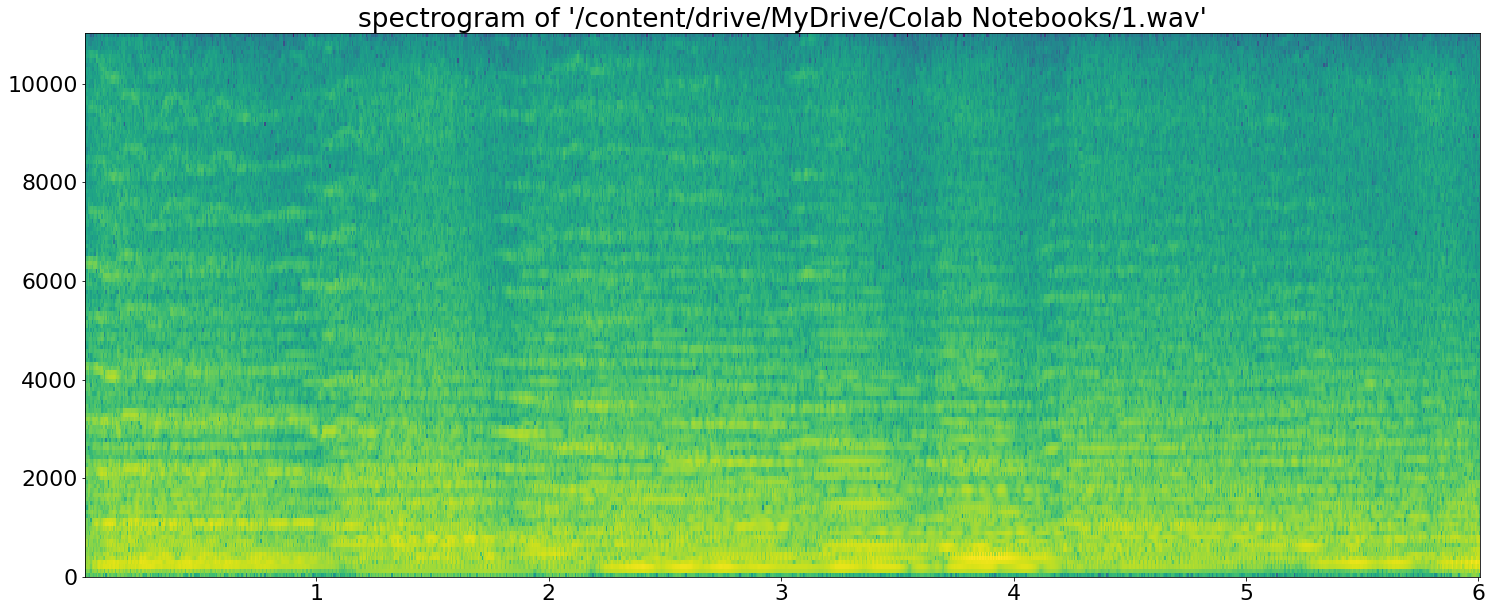

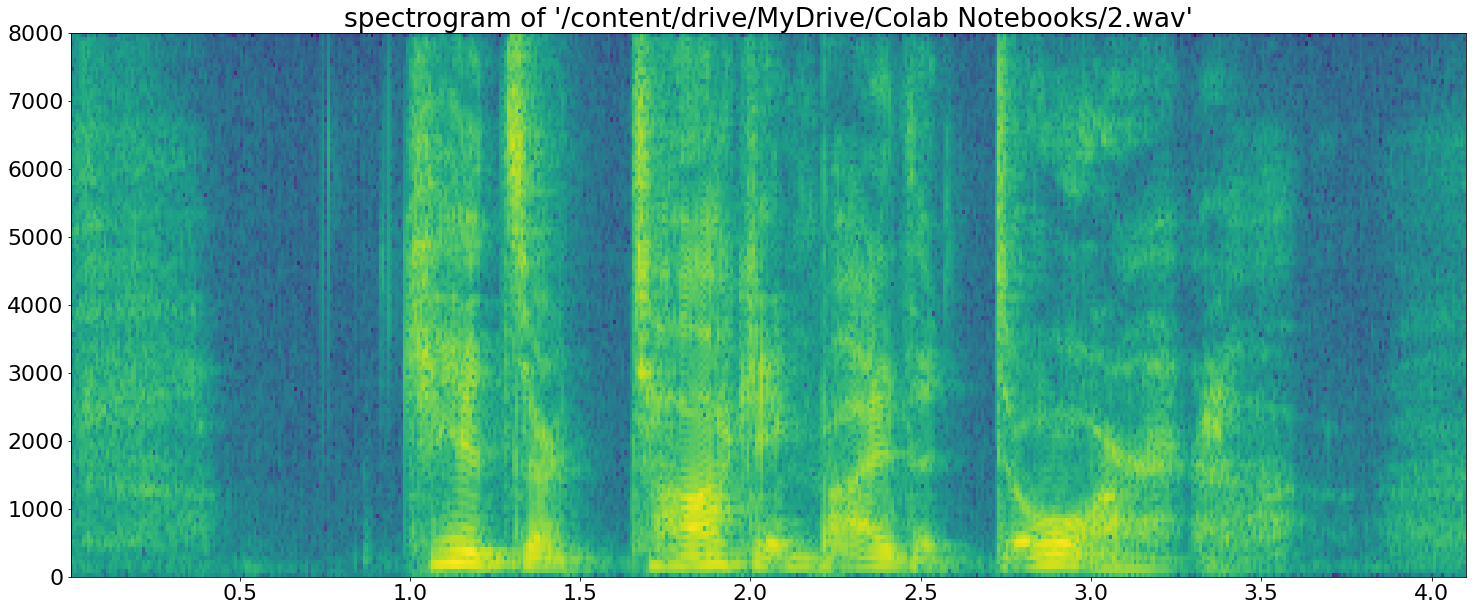

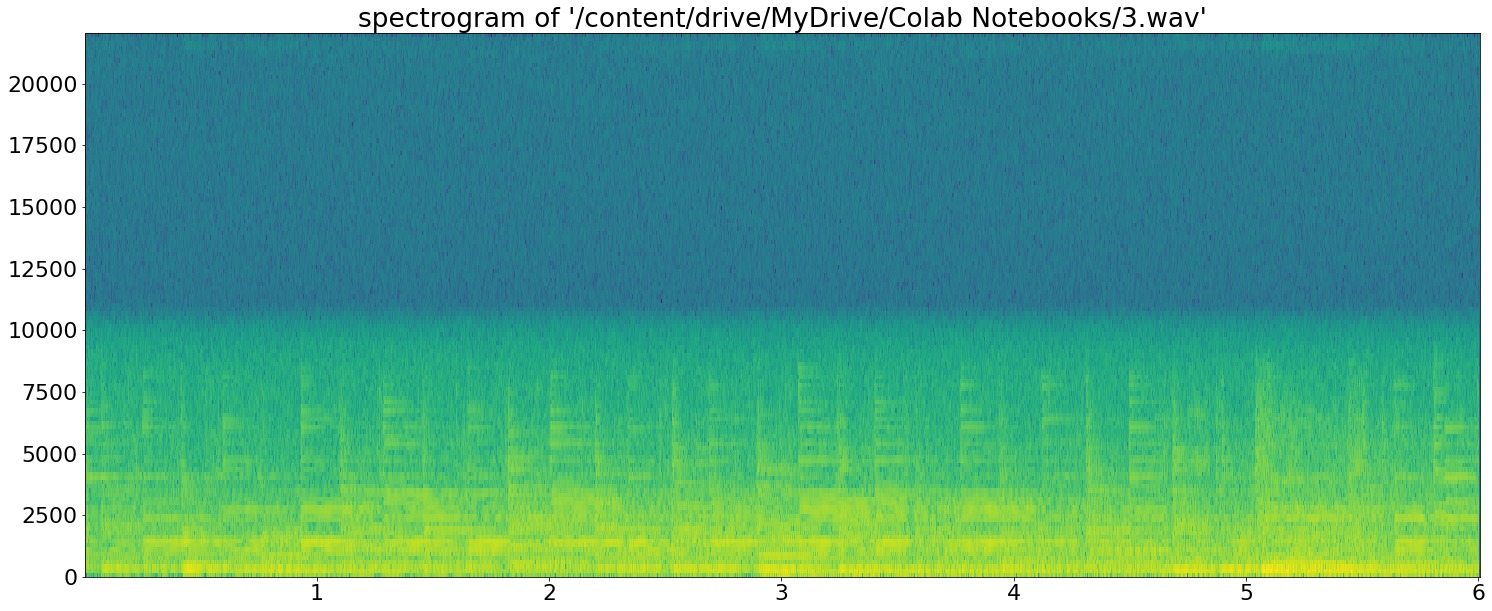

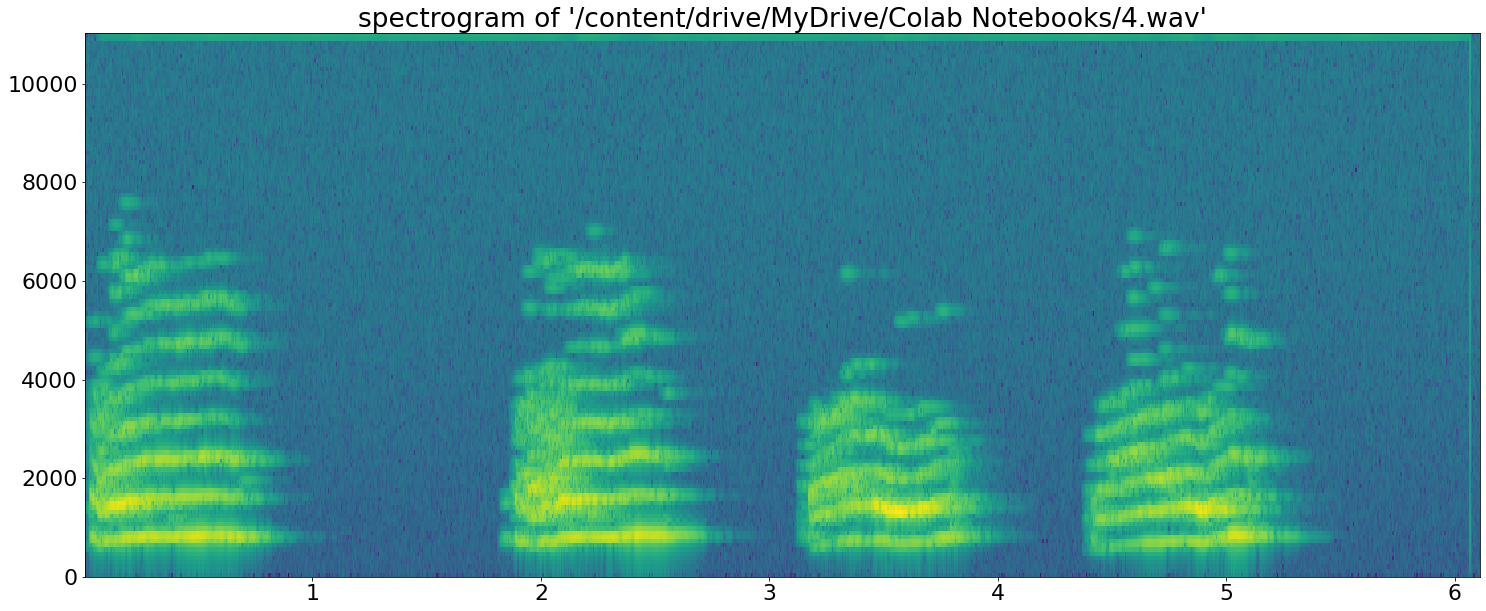

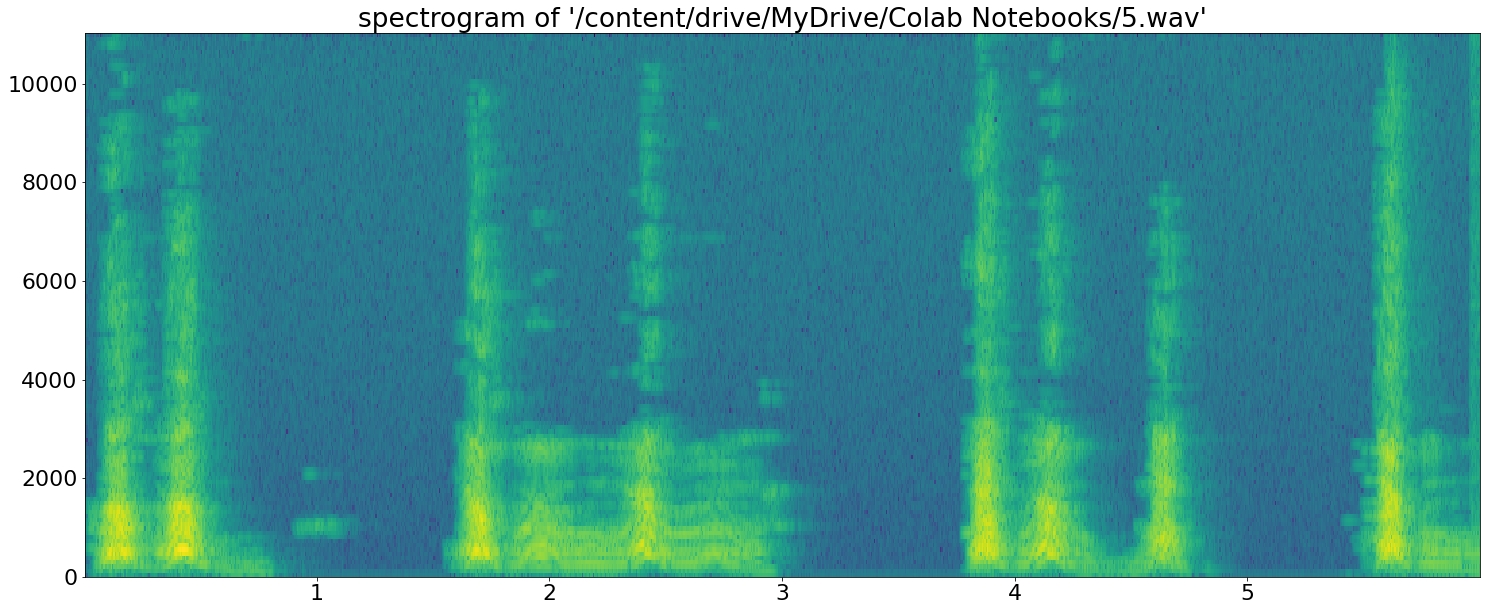

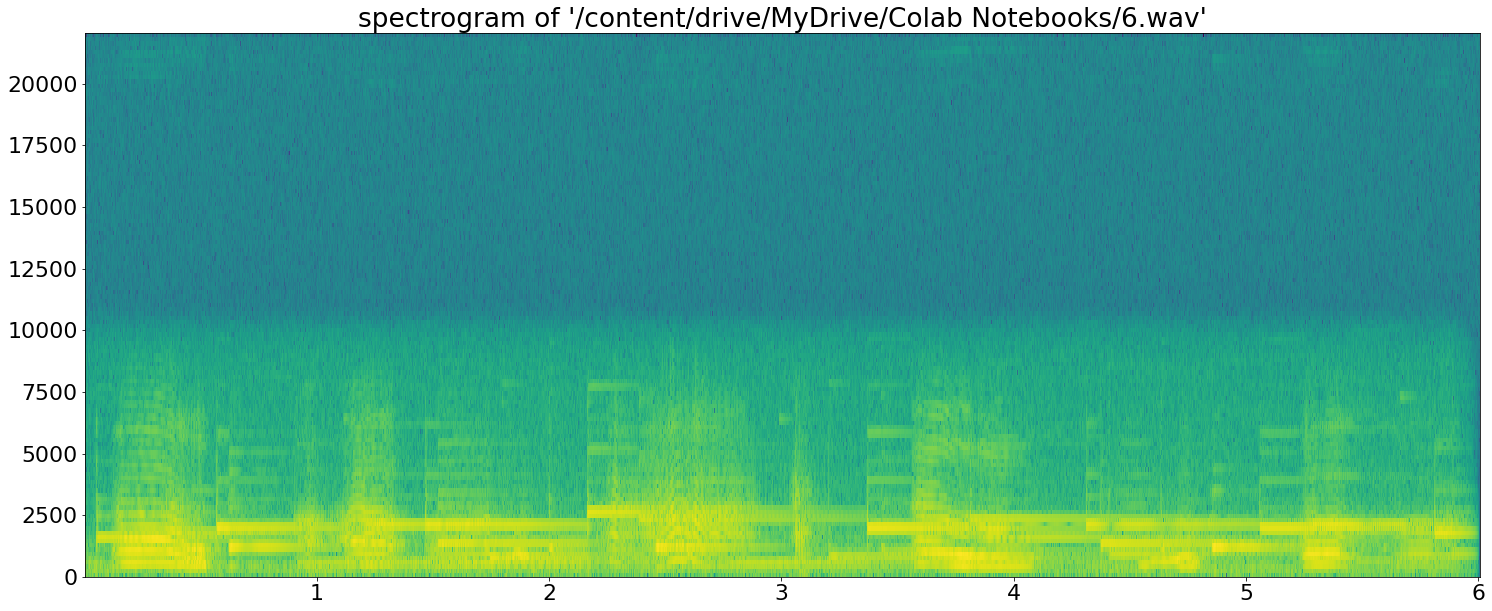

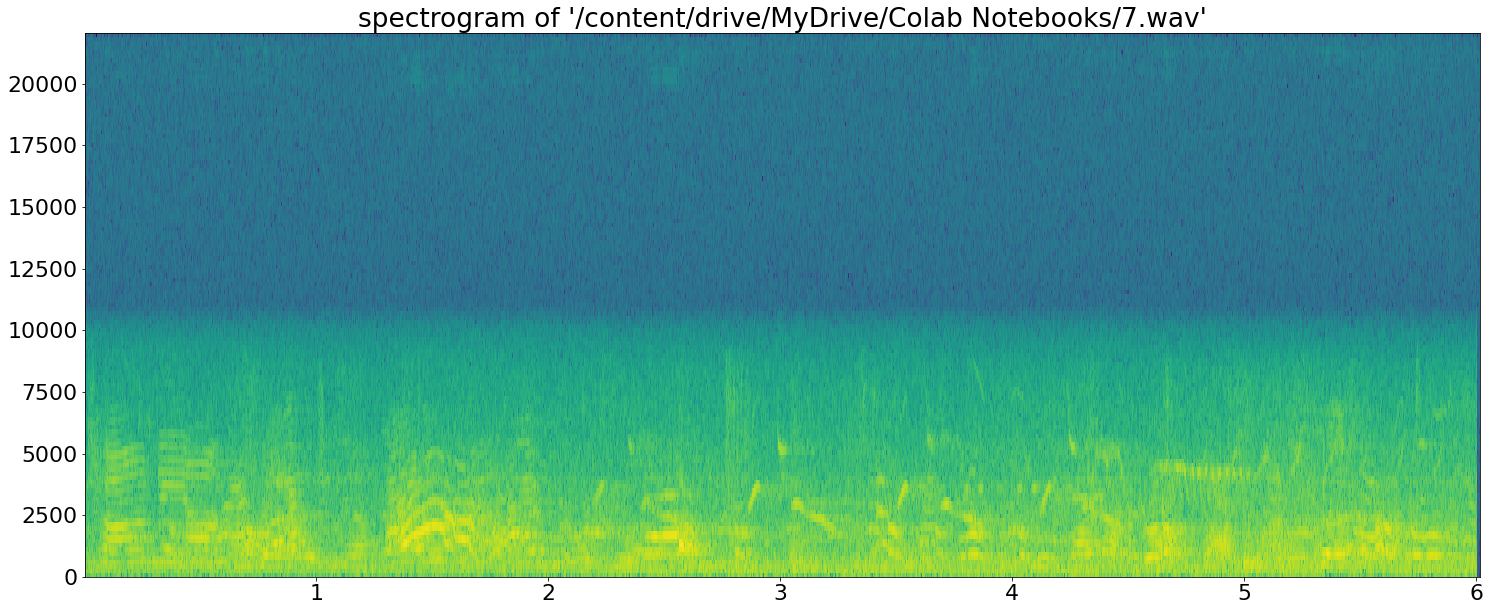

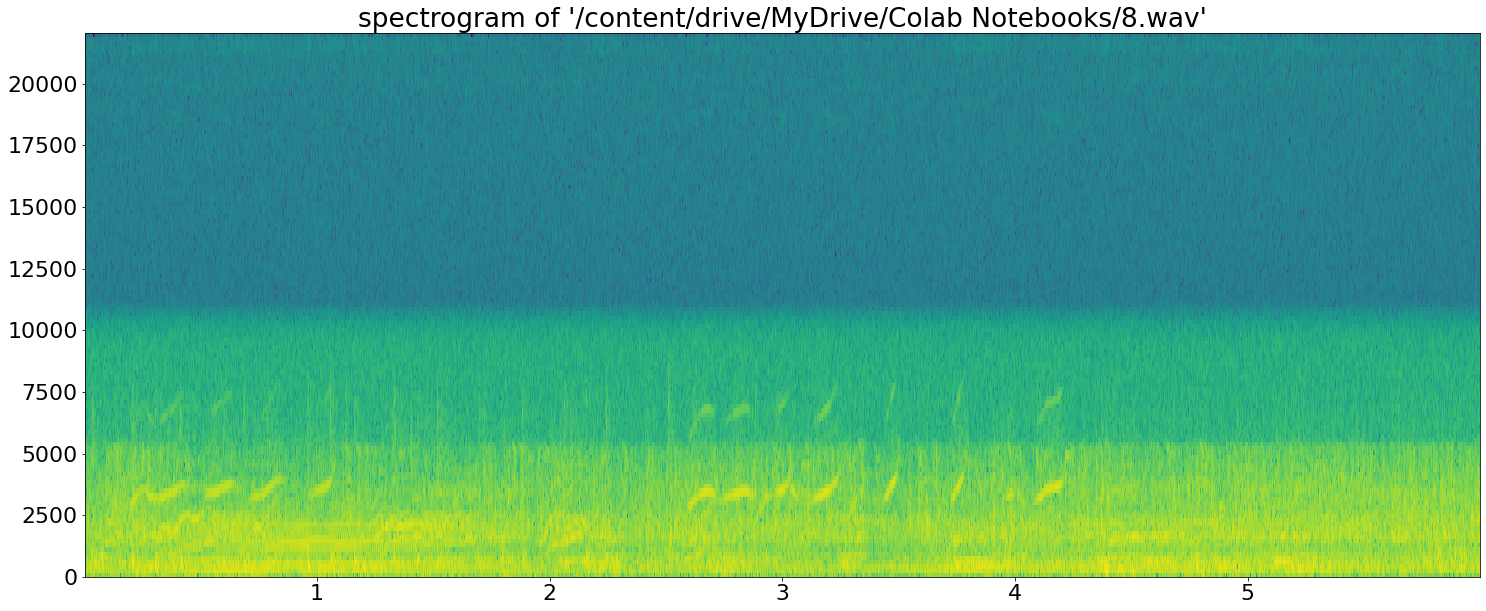

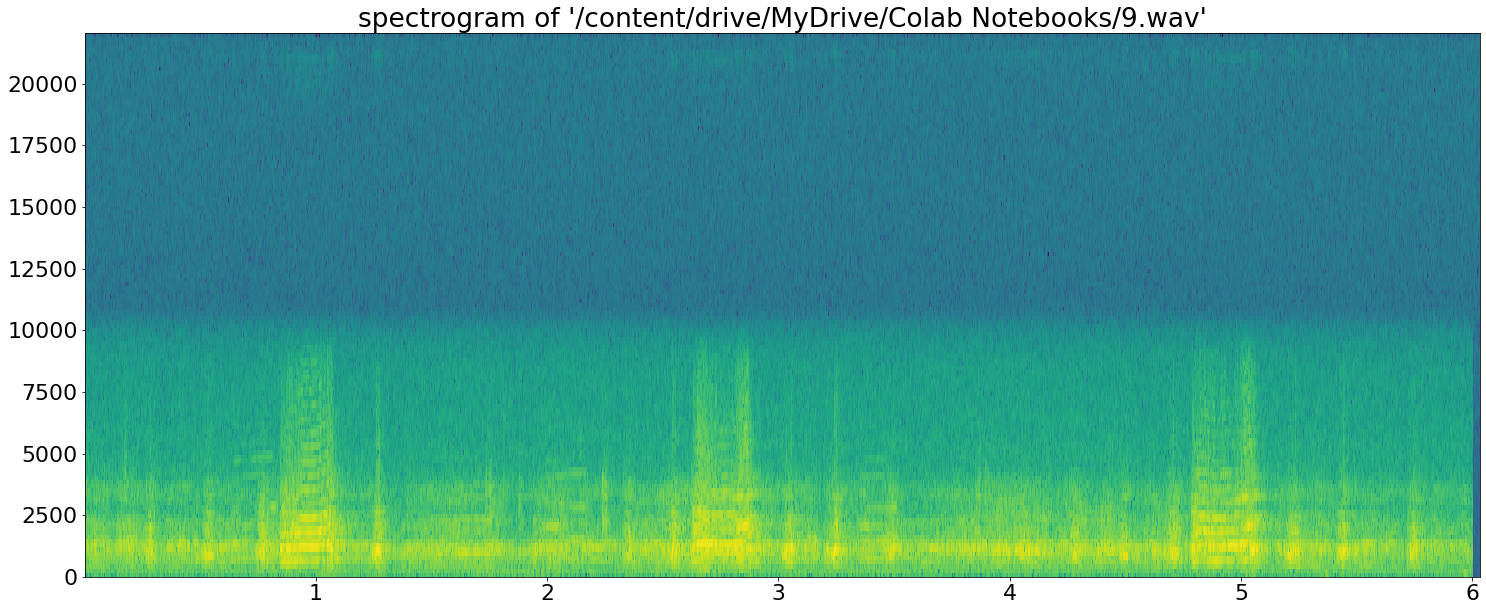

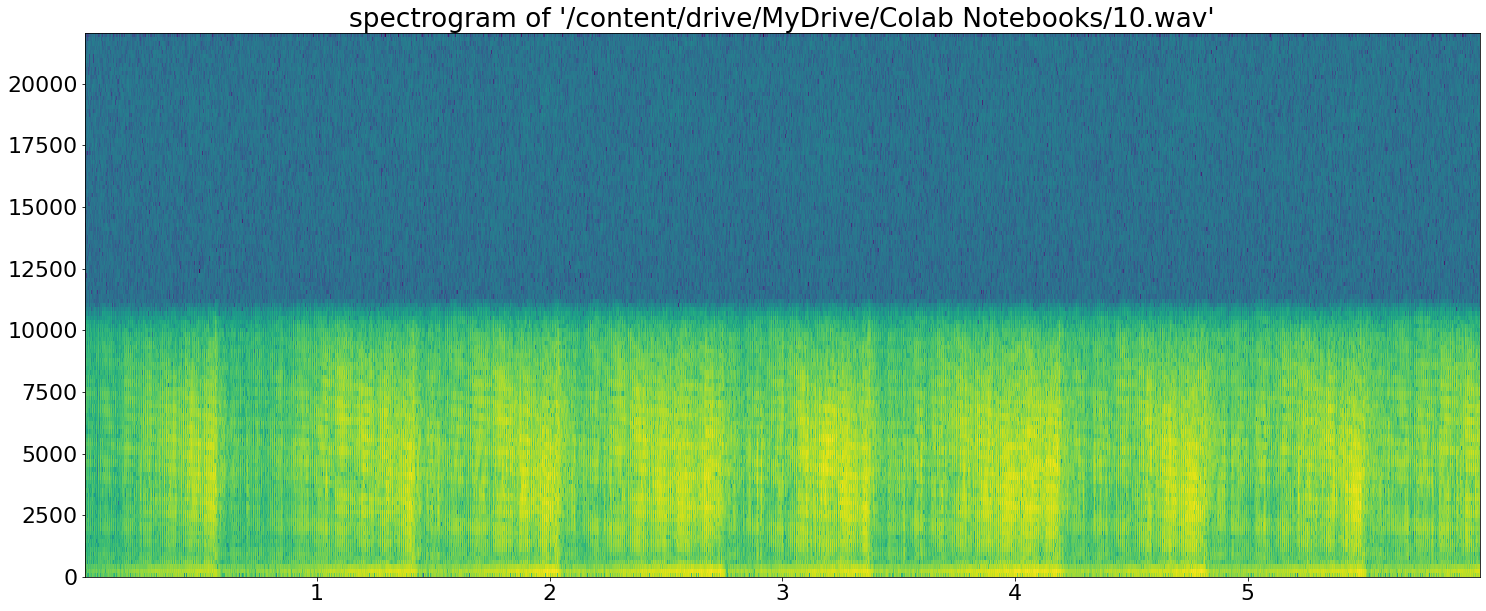

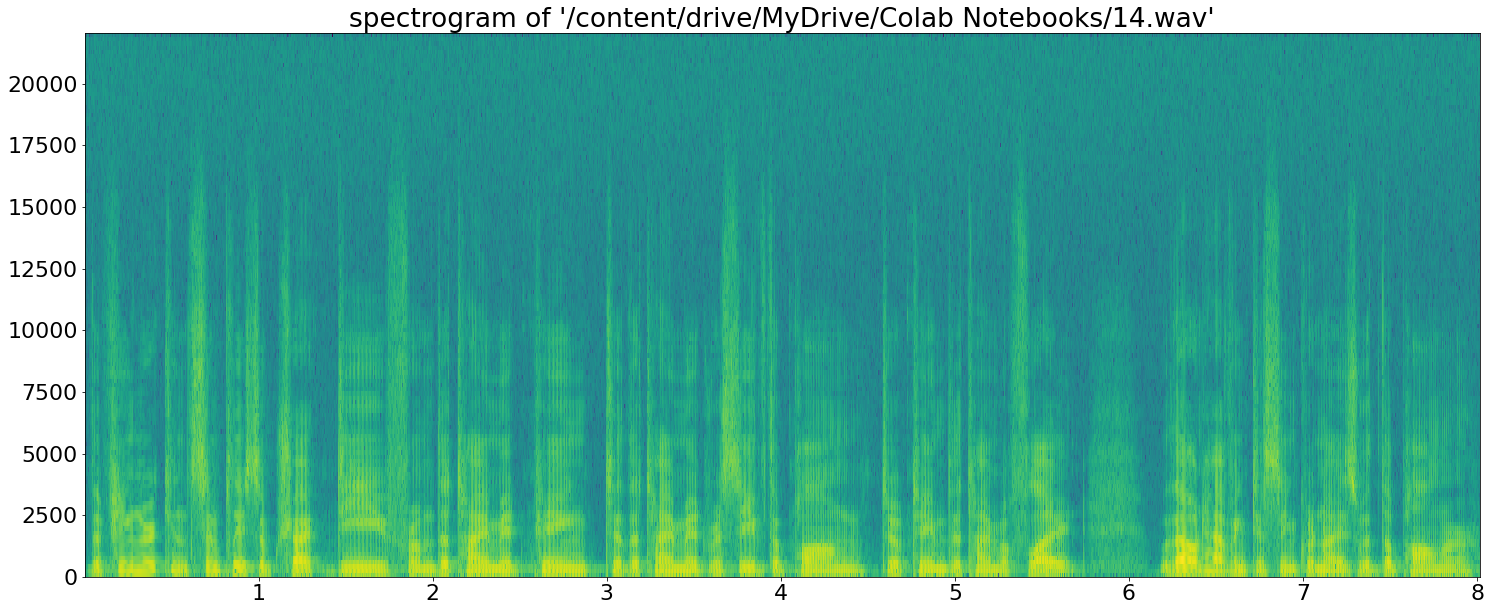

In [ ]:
import os
import wave
from google.colab import drive
drive.mount('/content/drive')
import pylab

myAudio1 = "/content/drive/MyDrive/Colab Notebooks/1.wav"
myAudio2 = "/content/drive/MyDrive/Colab Notebooks/2.wav"
myAudio3 = "/content/drive/MyDrive/Colab Notebooks/3.wav"
myAudio4 = "/content/drive/MyDrive/Colab Notebooks/4.wav"
myAudio5 = "/content/drive/MyDrive/Colab Notebooks/5.wav"
myAudio6 = "/content/drive/MyDrive/Colab Notebooks/6.wav"
myAudio7 = "/content/drive/MyDrive/Colab Notebooks/7.wav"
myAudio8 = "/content/drive/MyDrive/Colab Notebooks/8.wav"
myAudio9 = "/content/drive/MyDrive/Colab Notebooks/9.wav"
myAudio10 = "/content/drive/MyDrive/Colab Notebooks/10.wav"
myAudio = "/content/drive/MyDrive/Colab Notebooks/14.wav"

def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(25, 10))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

graph_spectrogram(myAudio1)
graph_spectrogram(myAudio2)
graph_spectrogram(myAudio3)
graph_spectrogram(myAudio4)
graph_spectrogram(myAudio5)
graph_spectrogram(myAudio6)
graph_spectrogram(myAudio7)
graph_spectrogram(myAudio8)
graph_spectrogram(myAudio9)
graph_spectrogram(myAudio10)
graph_spectrogram(myAudio)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


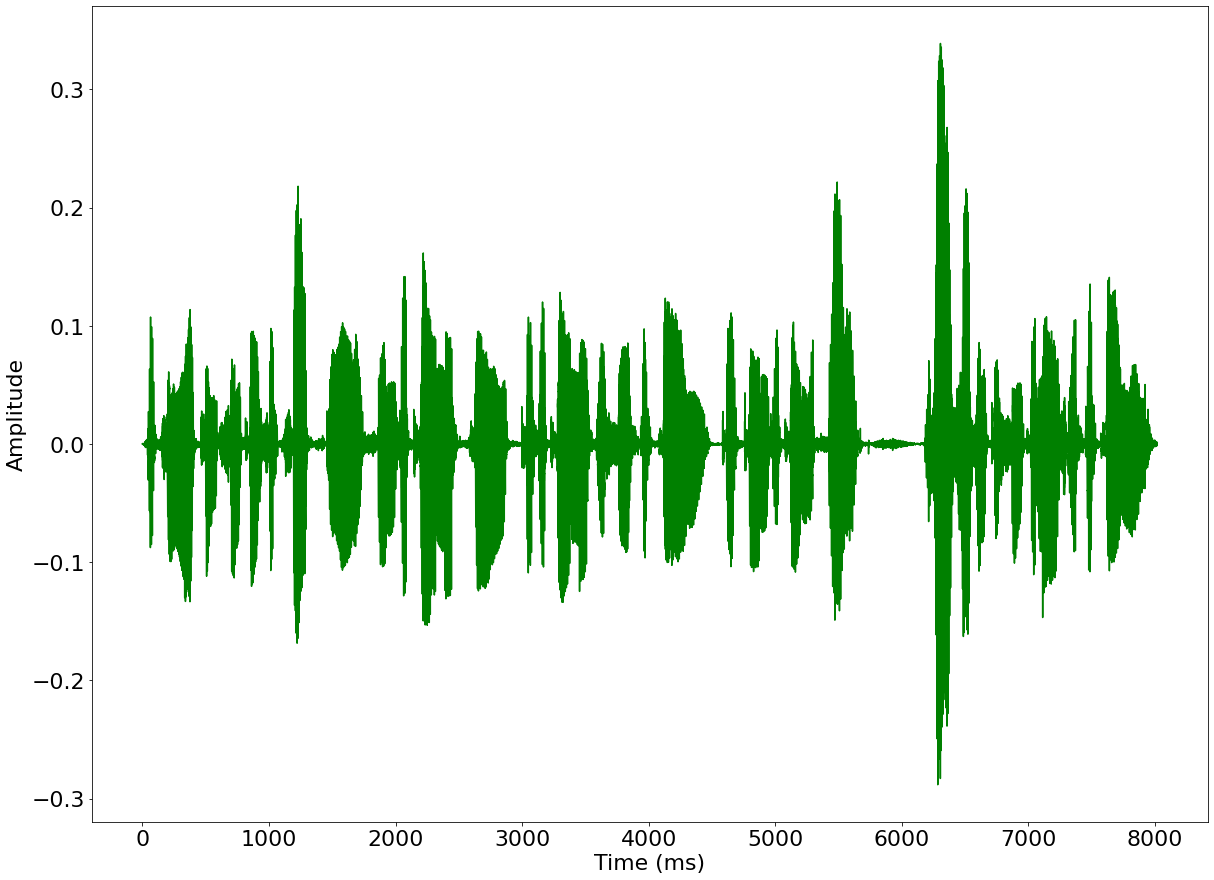

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


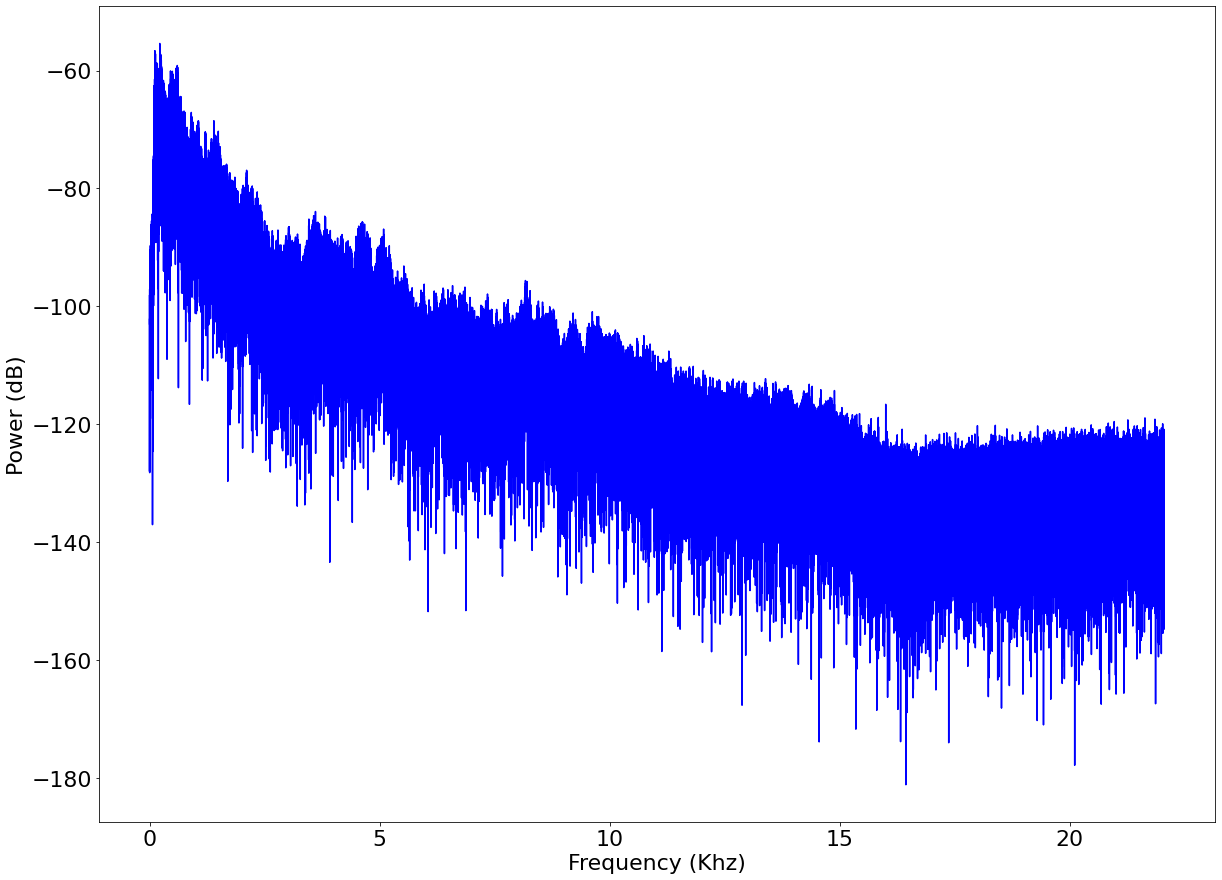

freqArrayLength = 176793
fftArray length = 176793


In [ ]:
import numpy
import matplotlib.pyplot as plt
import pylab
from scipy.io import wavfile
from scipy.fftpack import fft
from google.colab import drive
drive.mount('/content/drive')


myAudio = "/content/drive/MyDrive/Colab Notebooks/14.wav"

#Read file and get sampling freq [ usually 44100 Hz ]  and sound object
samplingFreq, mySound = wavfile.read(myAudio)

#Check if wave file is 16bit or 32 bit. 24bit is not supported
mySoundDataType = mySound.dtype

#We can convert our sound array to floating point values ranging from -1 to 1 as follows

mySound = mySound / (2.**15)

#Check sample points and sound channel for duel channel(5060, 2) or  (5060, ) for mono channel

mySoundShape = mySound.shape
samplePoints = float(mySound.shape[0])

#Get duration of sound file
signalDuration =  mySound.shape[0] / samplingFreq

#If two channels, then select only one channel

#Plotting the tone

# We can represent sound by plotting the pressure values against time axis.
#Create an array of sample point in one dimension
timeArray = numpy.arange(0, samplePoints, 1)

#
timeArray = timeArray / samplingFreq

#Scale to milliSeconds
timeArray = timeArray * 1000

#Plot the tone
plt.plot(timeArray, mySound, color='G')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()


#Plot frequency content
#We can get frquency from amplitude and time using FFT , Fast Fourier Transform algorithm

#Get length of mySound object array
mySoundLength = len(mySound)

#Take the Fourier transformation on given sample point 
#fftArray = fft(mySound)
fftArray = fft(mySound)

numUniquePoints = numpy.ceil((mySoundLength + 1) / 2.0)
fftArray = fftArray[0:int(numUniquePoints)]

#FFT contains both magnitude and phase and given in complex numbers in real + imaginary parts (a + ib) format.
#By taking absolute value , we get only real part

fftArray = abs(fftArray)

#Scale the fft array by length of sample points so that magnitude does not depend on
#the length of the signal or on its sampling frequency

fftArray = fftArray / float(mySoundLength)

#FFT has both positive and negative information. Square to get positive only
fftArray = fftArray **2

#Multiply by two (research why?)
#Odd NFFT excludes Nyquist point
if mySoundLength % 2 > 0: #we've got odd number of points in fft
    fftArray[1:len(fftArray)] = fftArray[1:len(fftArray)] * 2

else: #We've got even number of points in fft
    fftArray[1:len(fftArray) -1] = fftArray[1:len(fftArray) -1] * 2  

freqArray = numpy.arange(0, numUniquePoints, 1.0) * (samplingFreq / mySoundLength);

#Plot the frequency
plt.plot(freqArray/1000, 10 * numpy.log10 (fftArray), color='B')
plt.xlabel('Frequency (Khz)')
plt.ylabel('Power (dB)')
plt.show()

#Get List of element in frequency array
#print freqArray.dtype.type
freqArrayLength = len(freqArray)
print ("freqArrayLength =", freqArrayLength)
numpy.savetxt("freqData.txt", freqArray, fmt='%6.2f')

#Print FFtarray information
print ("fftArray length =", len(fftArray))
numpy.savetxt("fftData.txt", fftArray)

In [ ]:

def detect_peaks(x, num_train, num_guard, rate_fa):
    """
    Detect peaks with CFAR algorithm.
    num_train: Number of training cells.
    num_guard: Number of guard cells.
    rate_fa: False alarm rate.
    """
    num_cells = x.size
    num_train_half = round(num_train / 2)
    num_guard_half = round(num_guard / 2)
    num_side = num_train_half + num_guard_half
    alpha = num_train*(rate_fa**(-1/num_train) - 1) # threshold factor
    peak_idx = []
    for i in range(num_side, num_cells - num_side):
        if i != i-num_side+np.argmax(x[i-num_side:i+num_side+1]):
            continue
        sum1 = np.sum(x[i-num_side:i+num_side+1])
        sum2 = np.sum(x[i-num_guard_half:i+num_guard_half+1])
        p_noise = (sum1 - sum2) / num_train
        threshold = alpha * p_noise
        print(" threshold=", threshold)
        if x[i] > threshold:
            print(" i=", i)
            peak_idx.append(i)
    peak_idx = np.array(peak_idx, dtype=int)
    return peak_idx

y = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
x = np.arange(y.size)

 threshold= 0.5688640758906721
 i= 10
 threshold= 0.4817429596318879
 i= 49
 threshold= 0.5940833214258276
 i= 87
 threshold= 0.5123258705024349
 i= 131
 threshold= 0.4020254798159351
 i= 171


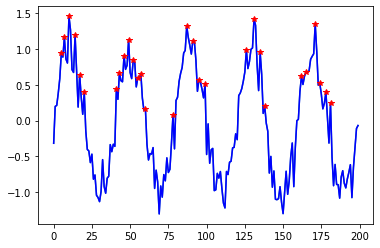

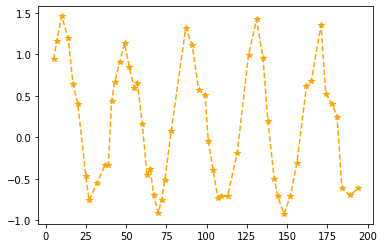

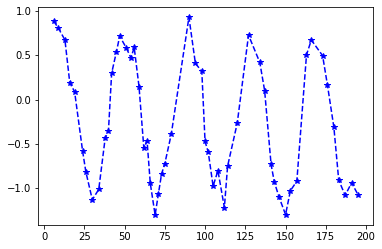

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
from scipy.signal import argrelextrema
%matplotlib inline

peaks = detect_peaks(y, 10, 2, 0.5)
peaks_ind = argrelextrema(y, np.greater)
peaks_ind = peaks_ind[0]
valleys_ind = argrelextrema(y, np.less)
valleys_ind = valleys_ind[0]
(fig, ax) = plt.subplots()
ax.plot(x, y)

peaks,_ = signal.find_peaks(y, height=0)
plt.plot(x, y, 'b')
for i in range(len(peaks)):
    plt.plot(x[peaks[i]], y[peaks[i]], 'r*')
    
plt.show()

x_peak = peaks_ind
y_peak = y[peaks_ind]
plt.plot(x_peak, y_peak, marker='*', linestyle='dashed', color='orange', label="peaks")
plt.show()
x_valley = valleys_ind
y_valley = y[valleys_ind]
plt.plot(x_valley, y_valley, marker='*', linestyle='dashed', color='blue', label="Valleys")

 threshold= 0.5688640758906721
 i= 10
 threshold= 0.4817429596318879
 i= 49
 threshold= 0.5940833214258276
 i= 87
 threshold= 0.5123258705024349
 i= 131
 threshold= 0.4020254798159351
 i= 171


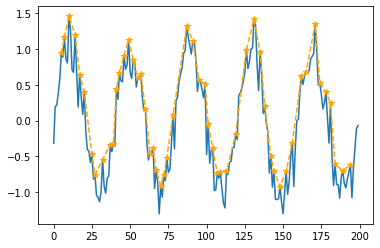

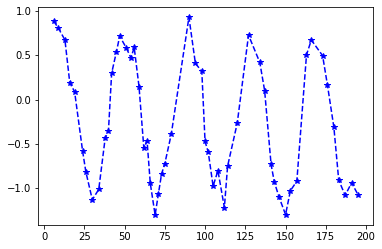

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
from scipy.signal import argrelextrema
%matplotlib inline

peaks = detect_peaks(y, 10, 2, 0.5)
peaks_ind = argrelextrema(y, np.greater)
peaks_ind = peaks_ind[0]
valleys_ind = argrelextrema(y, np.less)
valleys_ind = valleys_ind[0]
(fig, ax) = plt.subplots()
ax.plot(x, y)

x_peak = peaks_ind
y_peak = y[peaks_ind]
plt.plot(x_peak, y_peak, marker='*', linestyle='dashed', color='orange', label="peaks")
plt.show()
x_valley = valleys_ind
y_valley = y[valleys_ind]
plt.plot(x_valley, y_valley, marker='*', linestyle='dashed', color='blue', label="Valleys")

 threshold= 0.5688640758906721
 i= 10
 threshold= 0.4817429596318879
 i= 49
 threshold= 0.5940833214258276
 i= 87
 threshold= 0.5123258705024349
 i= 131
 threshold= 0.4020254798159351
 i= 171


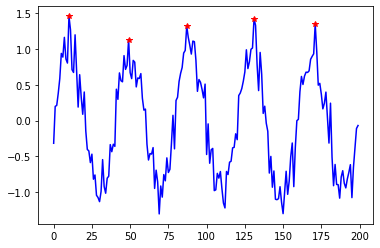

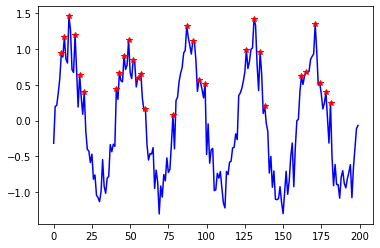

[ 1  1  1  1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1]
[ 3  6 10 14 15 18 21]
7


In [ ]:
#prima varianta de detectare de peaks: algoritmul CFAR

peaks = detect_peaks(y, 10, 2, 0.5)

plt.plot(x, y, 'b')
for i in range(len(peaks)):
    plt.plot(x[peaks[i]], y[peaks[i]], 'r*')
    
plt.show()

# a doua varianta de detectare de peaks (locale): 
a = np.diff(np.sign(np.diff(y))).nonzero()[0] + 1 # local min & max
b = (np.diff(np.sign(np.diff(y))) > 0).nonzero()[0] + 1 # local min
c = (np.diff(np.sign(np.diff(y))) < 0).nonzero()[0] + 1 # local max



# a treia varianta de detectare de peaks: scipy

peaks,_ = signal.find_peaks(y, height=0)
plt.plot(x, y, 'b')
for i in range(len(peaks)):
    plt.plot(x[peaks[i]], y[peaks[i]], 'r*')
    
plt.show()

a3 = [1, 2, 1, 1, 0, -3, -4, 7, 8, 9, 10, 0, -2, 0, 0, 1, 0, -3, 0, 5, 6, 7, -10]
s3 = np.sign(a3)
s3[s3==0] = -1 # replace zeros with -1
zero_crossings3 = np.where(np.diff(s3))[0]
print (s3)
print (zero_crossings3)
print (len(zero_crossings3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
22050
(176793,)
Sum of zero_crossing 21
(1, 346)


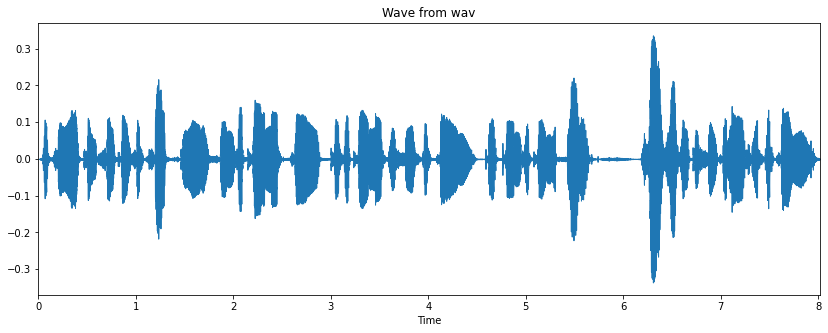

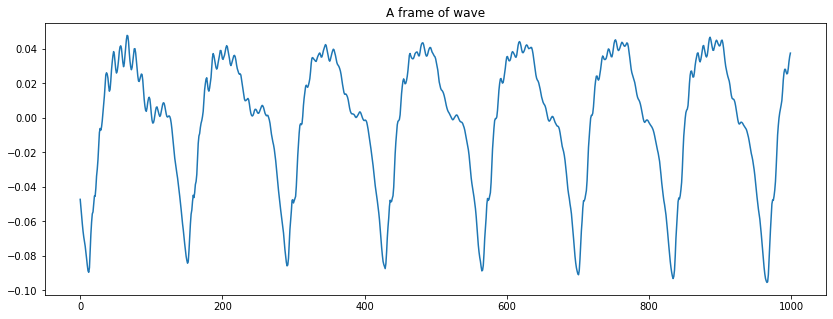

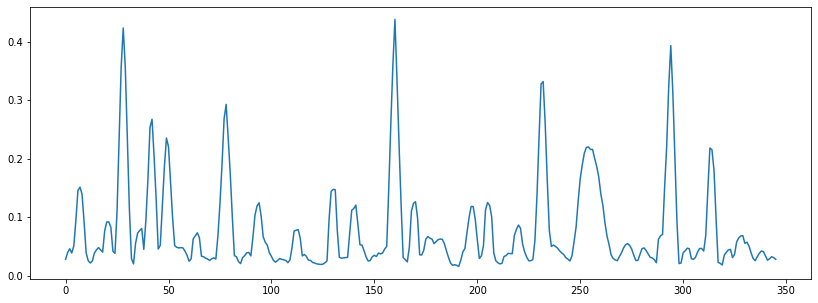

In [ ]:
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile
from google.colab import drive
drive.mount('/content/drive')


x, sr = lb.load("/content/drive/MyDrive/Colab Notebooks/14.wav") # sr – sampling rate pt fis wav
print (sr)
print(x.shape)
plt.figure(figsize=(14, 5))
plt.title('Wave from wav')
librosa.display.waveplot(x, sr=sr)
n0 = 5500 #se considera doar o parte din eșantioane
n1 = 6500 #se considera doar o parte din eșantioane
plt.figure(figsize=(14, 5))
plt.title('A frame of wave')
plt.plot(x[n0:n1])
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape
print('Sum of zero_crossing',sum(zero_crossings))
zcrs = librosa.feature.zero_crossing_rate(x)
print(zcrs.shape)
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])